Once deleted, variables cannot be recovered. Proceed (y/[n])? y


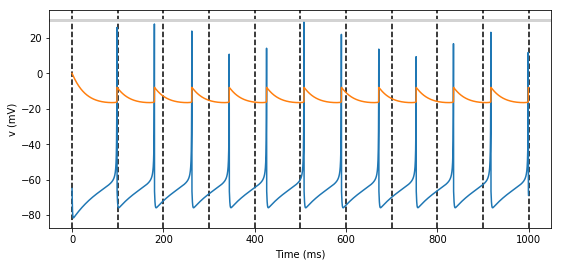

In [125]:
%reset

from brian2 import *
%matplotlib inline
    
start_scope()

tau = 1*ms

eqs = '''
dv/dt = ((0.04*v**2)/mV + 5*v + 140*mV - u)/tau : volt
du/dt = a * (b*v - u)/tau : volt
'''

# eqs = '''
# dv/dt = ((0.04*v**2) + 5*v + 140 - u)/tau : 1
# du/dt = a * (b*v - u)/tau : 1
# '''

# a = 0.05; b = 0.7  # should produce oscillation around 40Hz
a = 0.0275; b = 0.27  # should produce oscillation around 20Hz
# a = 0.025; b = 0.1  # should produce oscillation around 5Hz
# a = 0.02; b = 0.2  # common values - Izhikevich (2004)

c = -65*mV; d = 8*mV
# c = -65; d = 8

G = NeuronGroup(1, eqs, threshold='v>=30*mV', reset='''v=c; u=u+d''', method='euler')
G.v[0] = -65*mV
G.u[0] = 0

statemon_v = StateMonitor(G[:], 'v', record=True)
statemon_u = StateMonitor(G[:], 'u', record=True)
spikemon = SpikeMonitor(G[:], variables='v')

# create function/process where a random neuron is excited by 100 micro-Ampere per ms, and timestep
# G.I = 100
run_time = 1000
run(run_time*ms)

# create spike plots
figure(figsize=(9, 4))
for l in range(11):
    axvline(l*int(run_time/10), ls='--', c='k')
axhline(30, ls='-', c='lightgray', lw=3)
plot(statemon_v.t/ms, statemon_v.v.T/mV, '-', label='v')
plot(statemon_u.t/ms, statemon_u.u.T/mV, '-', label='u')
xlabel('Time (ms)')
ylabel('v (mV)');

# output_rates = spikemon.num_spikes/(run_time*ms)
# print("avg. network firing rate: ", output_rates)